In [20]:
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (5, 3) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率

In [21]:
import seaborn as sns

In [22]:
sns.set()

In [23]:
tf.__version__

'1.15.4'

## 创建数据

In [24]:
import numpy as np

In [25]:
x = np.linspace(1, 20, 30)

In [26]:
y = 2 * x + np.random.normal(size=30) * 2

<AxesSubplot:>

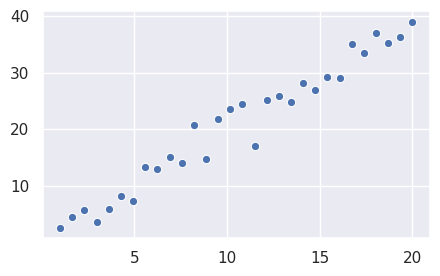

In [27]:
sns.scatterplot(x = x, y = y)

In [28]:
datasets = keras.datasets.mnist

In [29]:
datasets

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from '/usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v1/keras/datasets/mnist/__init__.py'>

In [30]:
(train_x, train_y), (valid_x, valid_y) = datasets.load_data()

In [31]:
train_x.shape

(60000, 28, 28)

In [32]:
valid_x.shape

(10000, 28, 28)

In [33]:
train_y.shape

(60000,)

In [34]:
from functools import partial

$$
image = MXM\\
stripe = F\\
kernel_size=K\\
padding="VALID"\\
out = \left\lceil\frac{M - K + 1}{F}\right\rceil\\
padding="SAME"\\
out = \left\lceil\frac{M}{F}\right\rceil
$$

In [44]:
model = keras.models.Sequential()
partial(tf.nn.leaky_relu, alpha=0.3)

functools.partial(<function leaky_relu at 0x7f7e3cf799d8>, alpha=0.3)

In [45]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation=partial(tf.nn.leaky_relu, alpha=0.3)))
model.add(keras.layers.Dense(200, activation=partial(tf.nn.leaky_relu, alpha=0.3)))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [84]:
# hitstory = model.fit(x = train_x, y = train_y, batch_size=215, 
#                      epochs=40, validation_data=(valid_x, valid_y))

In [50]:
import seaborn as sns
sns.set()

In [51]:
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

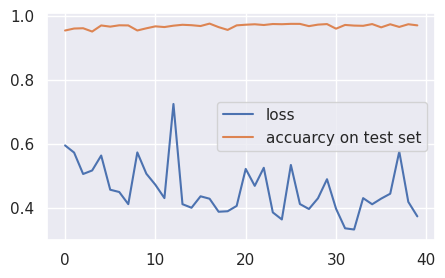

In [59]:
sns.lineplot(x = np.arange(0, len(model.history.history["loss"]), 1),
             y = model.history.history["loss"], label="loss")

ax = sns.lineplot(x = np.arange(0, len(model.history.history["loss"]), 1),
             y = model.history.history["val_acc"], label="accuarcy on test set")


(0.5, 1.0)

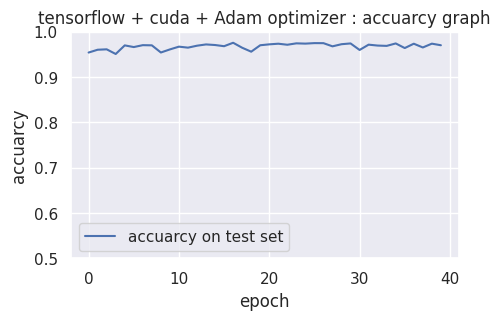

In [80]:
# ax1 = sns.lineplot(x = np.arange(0, len(model.history.history["loss"]), 1),
#              y = model.history.history["val_loss"], label="loss")
ax2 = sns.lineplot(x = np.arange(0, len(model.history.history["loss"]), 1),
             y = model.history.history["val_acc"], label="accuarcy on test set")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuarcy")
ax2.set_title("tensorflow + cuda + Adam optimizer : accuarcy graph")
ax2.set_ylim(0.5, 1)

(0.0, 1.0)

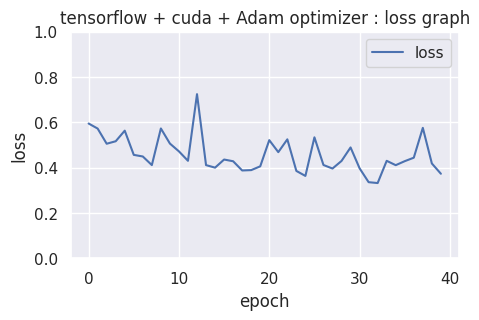

In [78]:
ax1 = sns.lineplot(x = np.arange(0, len(model.history.history["loss"]), 1),
             y = model.history.history["loss"], label="loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.set_title("tensorflow + cuda + Adam optimizer : loss graph")
ax1.set_ylim(0, 1)

In [180]:
model = tf.keras.models.Sequential()

In [181]:
model.add(keras.layers.Conv2D(filters=16, kernel_size=3,
                              input_shape=(28,28,1),padding="valid", strides=2,
                                 activation=tf.nn.relu))

model.add(keras.layers.Conv2D(filters=32, kernel_size=1 ,padding="same", strides=1,
                                 activation=tf.nn.relu))

model.add(keras.layers.Conv2D(filters=32, kernel_size=3 ,padding="valid", strides=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(200))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10, activation=tf.nn.sigmoid))

In [182]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 13, 13, 32)        544       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 6, 6, 32)          128       
_________________________________________________________________
re_lu_26 (ReLU)              (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 500)             

In [190]:
model.compile(optimizer=tf.optimizers.Adam(lr=1e-3),
              loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [81]:
history = model.fit(x = np.expand_dims(train_x, axis=3), y = train_y, batch_size=512,
                    epochs=2000, validation_data=(np.expand_dims(valid_x, axis=3), valid_y))

(-0.5, 27.5, 27.5, -0.5)

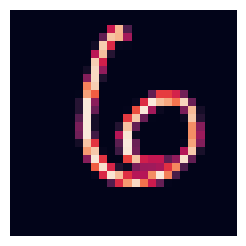

In [51]:
plt.imshow(valid_x[100].reshape( 28, 28, 1))
plt.axis("off")

In [ ]:
train_y

In [ ]:
data.reshape(1, 28, 28, 1).shape

In [ ]:
1e-4

In [77]:
import torch

In [79]:
a = torch.rand(5, 8)

In [80]:
b = torch.rand(5, 8)

In [85]:
torch.stack((a, b), dim=2).shape

torch.Size([5, 8, 2])

In [83]:
torch.stack((a, b), dim=2)

In [87]:
from torch import nn

In [95]:
data = nn.ModuleList()
data += [nn.Sequential(nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 10))]
data += [nn.Sequential(nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 512),
                                            nn.ReLU(),
                                            nn.Linear(512, 10))]

In [96]:
for layer in data:
    print(layer)

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=10, bias=True)
)


In [97]:
for idx, layer in enumerate(data):
    print(idx)

0
1
